In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\sarth\Downloads\archive (1).zip")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6986 entries, 0 to 6985
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6986 non-null   object 
 1   open       6986 non-null   float64
 2   high       6986 non-null   float64
 3   low        6986 non-null   float64
 4   close      6986 non-null   float64
 5   adj_close  6986 non-null   float64
 6   volume     6986 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 382.2+ KB


In [4]:
df.describe()

,open,high,low,close,adj_close,volume
count,6986.000000,6986.000000,6986.000000,6986.000000,6986.000000,6.986000e+03
mean,40.666560,41.139546,40.153303,40.659883,40.659883,1.360668e+08
std,58.107283,58.751435,57.401423,58.091213,58.091213,1.375800e+08
min,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06
25%,2.100125,2.148125,2.064125,2.109750,2.109750,6.300350e+07
50%,9.033250,9.158500,8.921750,9.017000,9.017000,1.005360e+08
75%,72.673750,73.596622,71.368876,72.900251,72.900251,1.555295e+08
max,239.020004,242.520004,238.029999,242.059998,242.059998,2.086584e+09


In [5]:
df.head()


,date,open,high,low,close,adj_close,volume
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [6]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

In [7]:
df['date'] = pd.to_datetime(df['date'])

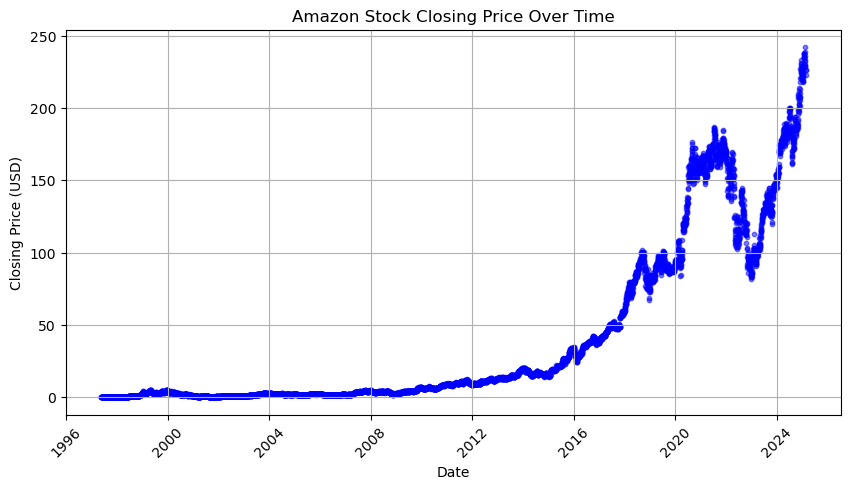

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(df['date'], df['close'], alpha=0.5, s=10, color='blue')
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Amazon Stock Closing Price Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [9]:
df['date'] = pd.to_datetime(df['date'], utc=True)
df['date'] = df['date'].dt.tz_localize(None) 
df.set_index('date', inplace=True)

In [10]:
df_monthly = df['close'].resample('M').mean()

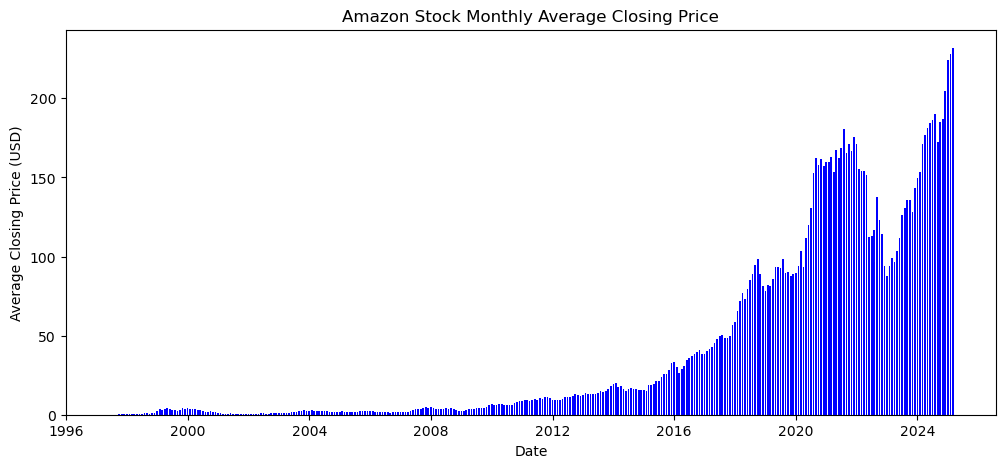

In [11]:
plt.figure(figsize=(12, 5))
plt.bar(df_monthly.index, df_monthly.values, color='blue', width=20)
plt.xlabel("Date")
plt.ylabel("Average Closing Price (USD)")
plt.title("Amazon Stock Monthly Average Closing Price")
plt.show()

In [12]:
df.columns

Index(['open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

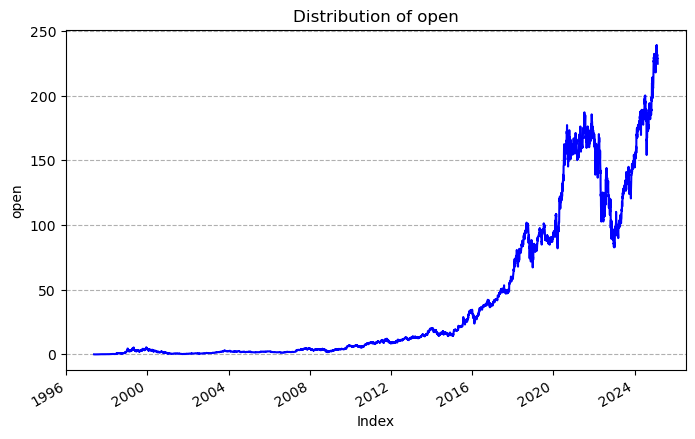

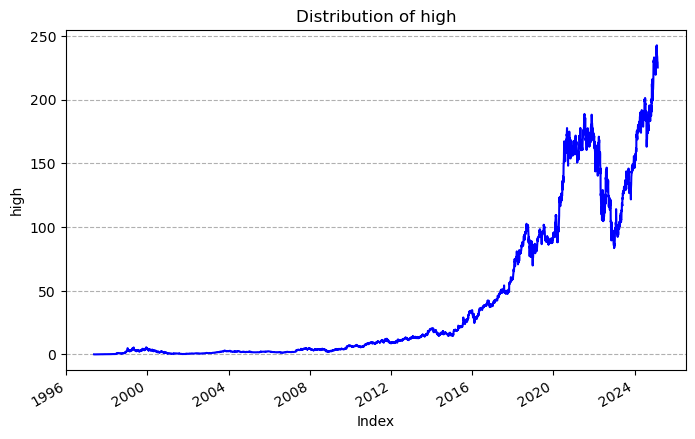

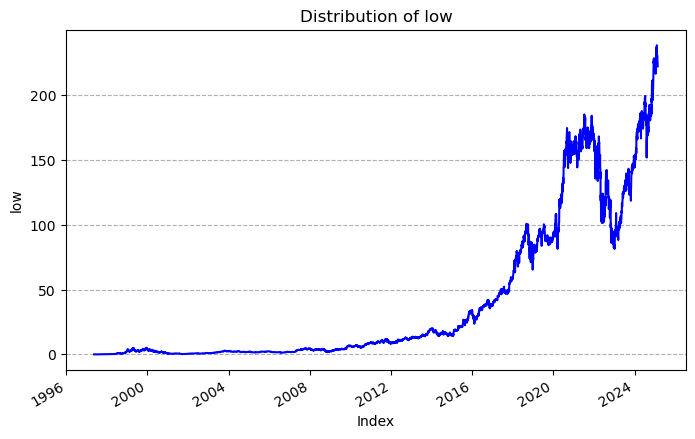

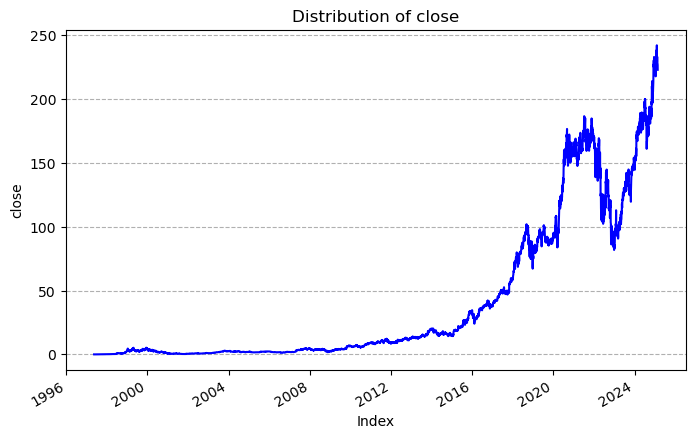

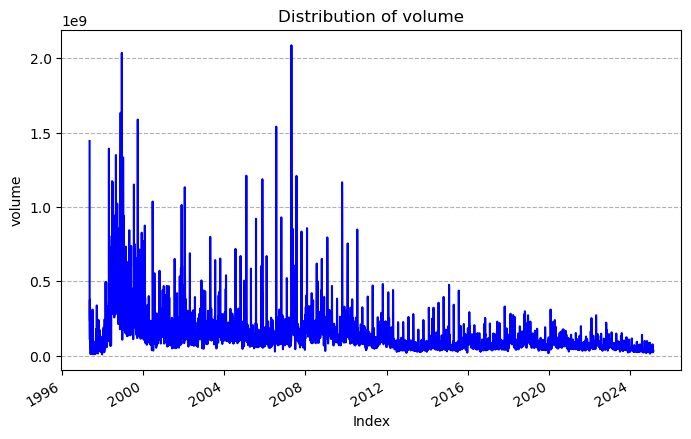

In [13]:
def bar_plot(column):
    plt.figure(figsize=(8, 5))
    df[column].plot( color='blue')
    plt.xlabel("Index")
    plt.ylabel(column)
    plt.title(f"Distribution of {column}")
    plt.grid(axis='y', linestyle='--')
    plt.show()


column_data = ['open', 'high', 'low', 'close', 'volume']


for col in column_data:
    bar_plot(col)

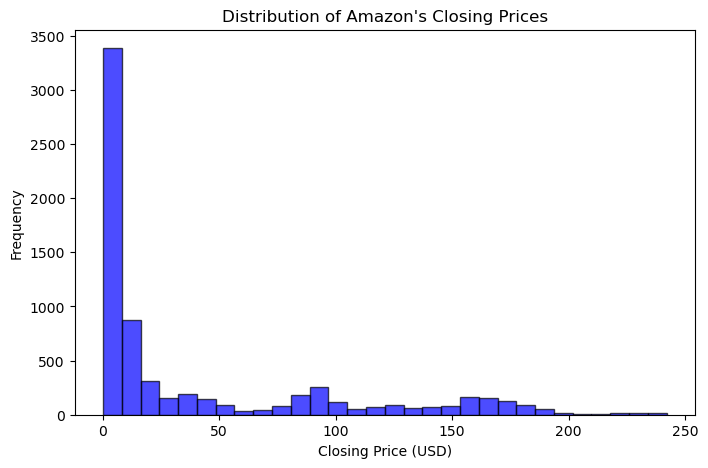

In [14]:
plt.figure(figsize=(8, 5))
plt.hist(df['close'].dropna(), bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Closing Price (USD)")
plt.ylabel("Frequency")
plt.title("Distribution of Amazon's Closing Prices")
plt.show()

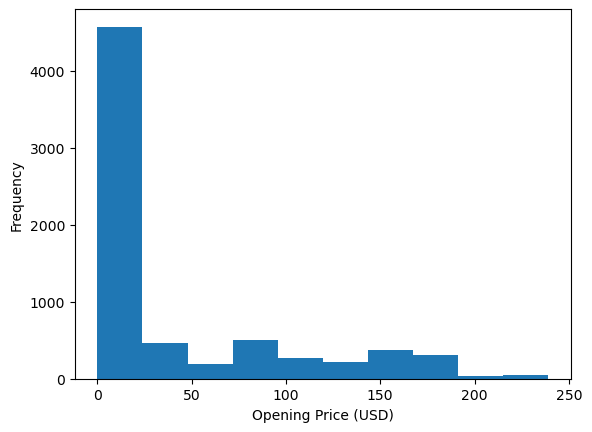

In [18]:
plt.hist(df['open'])
plt.ylabel("Frequency")
plt.xlabel("Opening Price (USD)")

plt.show()

In [19]:
df.isna().sum()

open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

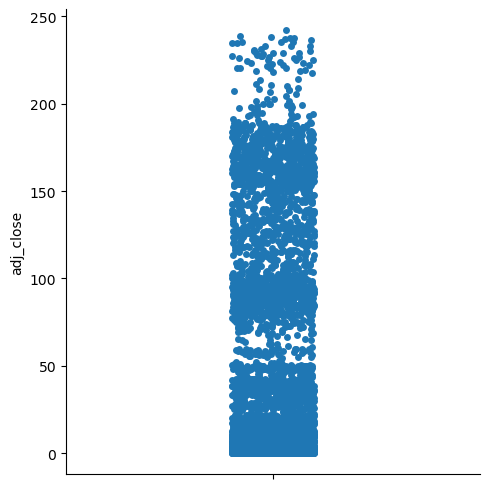

In [23]:
sns.catplot(df['adj_close'])

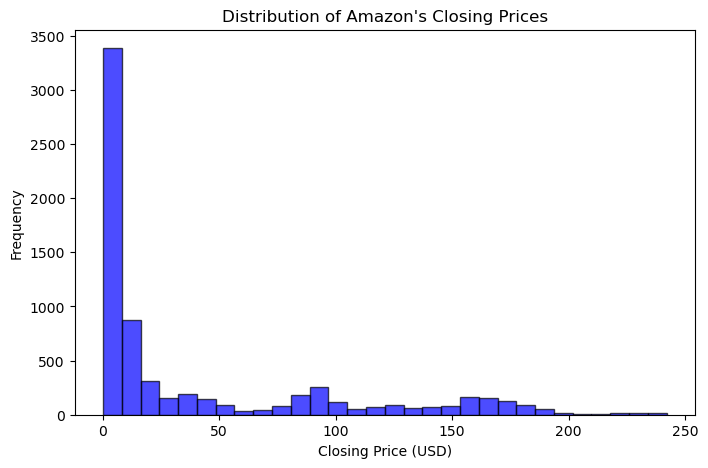

In [24]:
plt.figure(figsize=(8, 5))
plt.hist(df['close'].dropna(), bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Closing Price (USD)")
plt.ylabel("Frequency")
plt.title("Distribution of Amazon's Closing Prices")
plt.show()

In [25]:
df.isna().sum()

open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

<Axes: ylabel='open'>

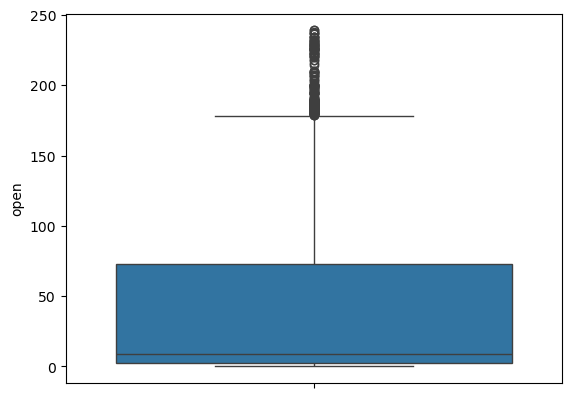

In [26]:
sns.boxplot(df['open'])

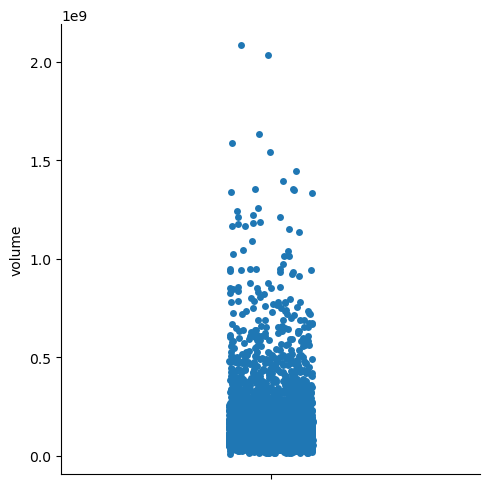

In [27]:
sns.catplot(df['volume'])

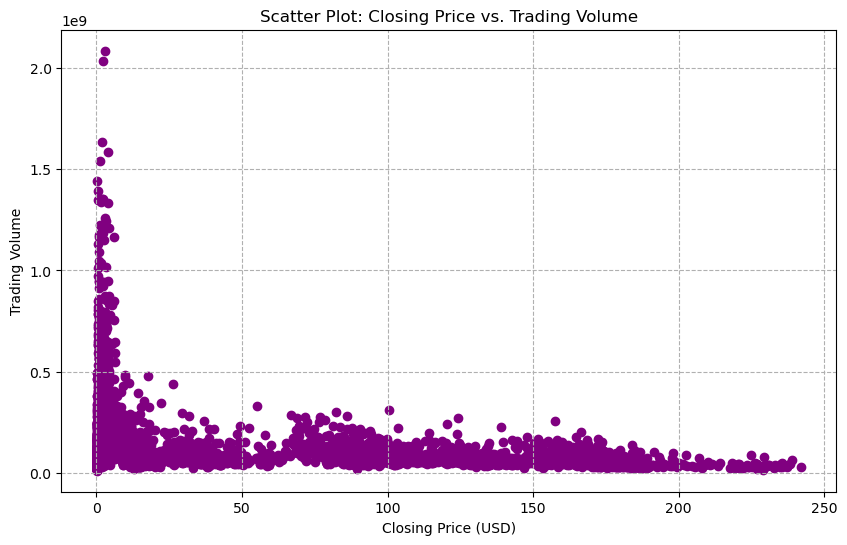

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df['close'], df['volume'], color='purple')
plt.xlabel("Closing Price (USD)")
plt.ylabel("Trading Volume")
plt.title("Scatter Plot: Closing Price vs. Trading Volume")
plt.grid(True, linestyle='--')
plt.show()

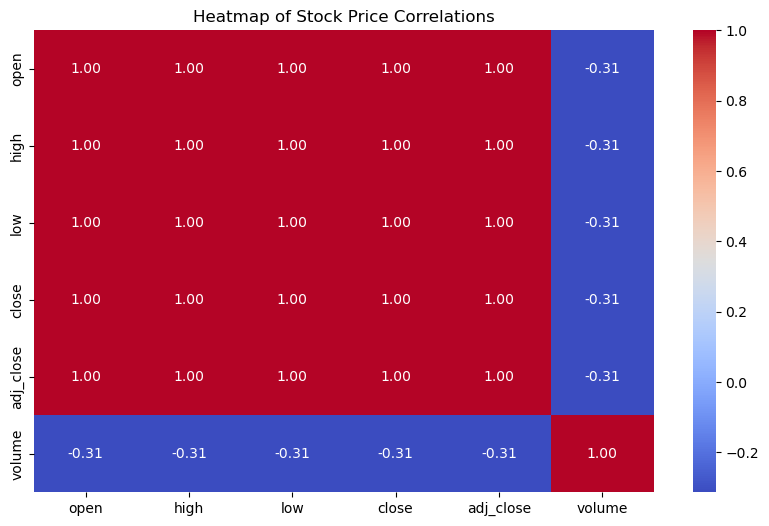

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['open', 'high', 'low', 'close', 'adj_close', 'volume']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Stock Price Correlations")
plt.show()